# Auswertung Versuch 233: Fourier-Optik

## Teil 1: Quantitative Beobachtungen am Einzelspalt

### Bestimmung der Spaltbreite

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')
from scipy.optimize import curve_fit
plt.rcParams['errorbar.capsize']=2

Die Spaltbreite entspricht der Steigung der Fit-Gerade:
d = 165.299920524 +/- 2.7348316102 pxl


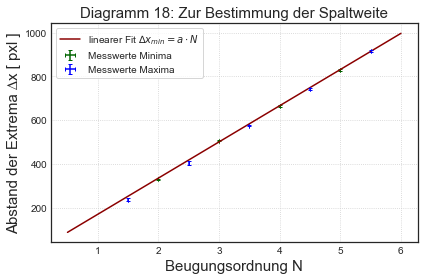

In [9]:
#Definition der linearen Fit-Funktion
def linear_fit(x,a,b): 
    return a*x+b
popt,pcov=curve_fit(linear_fit,min_order,delta_min,sigma=delta_min_err)

x_fit=np.linspace(0.5,6,100) #Länge der Fit-Gerade
x_err=np.zeros(5) #Nur zur Optik der Legende
x_err1 = np.zeros(4)


#Plot der Minima-Abstände mit lin.Fit
plt.plot(min_order,delta_min,linestyle='')
plt.errorbar(min_order,delta_min,xerr=x_err1,yerr=delta_min_err,color='darkgreen',linestyle='',label='Messwerte Minima')
plt.plot(x_fit,linear_fit(x_fit,*popt),color='darkred',label='linearer Fit $ ∆x_{min} = a \cdot N $')

#Plot der Maxima-Abstände 
plt.plot(max_order,delta_max,linestyle='')
plt.errorbar(max_order,delta_max,xerr=x_err,yerr=delta_max_err,color='b',linestyle='',label='Messwerte Maxima')

#Plot-Parameter
plt.xlabel('Beugungsordnung N',size=15)
plt.ylabel('Abstand der Extrema ∆x [ pxl ]',size=15)
plt.title('Diagramm 18: Zur Bestimmung der Spaltweite',size=15)
plt.grid(ls='dotted')
plt.legend(frameon=True)

#Abspeichern des Diagramms
plt.tight_layout()
plt.savefig(r'C:\Users\Quirinus\Documents\GitHub\Praktikum\Praktikum\233 - Fourieroptik\Diagramme\Diagramm Teil1.pdf',format='PDF')

slit_width=popt[0]
slit_width_err=pcov[0,0]**0.5

print('Die Spaltbreite entspricht der Steigung der Fit-Gerade:')
print( 'd = ' + str(slit_width) + ' +/- ' + str(slit_width_err) + ' pxl')


In [10]:
#Umrechnung der Spaltbreite in mm
slit_width_mm= gauge*slit_width
slit_width_mm_err=np.sqrt((gauge_err)**2+(slit_width_err*gauge)**2)

sw_mm_mean=np.mean(slit_width_mm)
sw_mm_mean_syst=np.mean(slit_width_mm_err)
sw_mm_mean_std=np.std(slit_width_mm)/np.sqrt(len(slit_width_mm))

print('Mit der Eichung der Skala erhalten wir die Spaltbreite in mm:')
print( 'd = ' + str(sw_mm_mean) + ' +/- ' + str(sw_mm_mean_syst) + ' +/- ' + str(sw_mm_mean_std)+ ' mm')


Mit der Eichung der Skala erhalten wir die Spaltbreite in mm:
d = 0.437134242748 +/- 0.00723272709102 +/- 0.00871682280905 mm


### Vergleich der relativen Intensitäten aus den beide Messreihen

In [11]:
#zunächst einmal muss das Verhältnis aus der ersten Messung bestimmt werden,da bei der zweiten das 0. Max. übersteuert



#Abziehen des Untergrunds durch Mittlung des linken und des rechten Untergrundes



#Abziehen des linken Untergrunds
max1_left1_corr=max1_intensity_left1-ug_left1
max1_left1_corr_err=np.sqrt(2)*intensity_err


#Abziehen des rechten Untergrunds
max1_right1_corr=max1_intensity_right1-ug_right1
max1_right1_corr_err=np.sqrt(2)*intensity_err

#Verhältnis vom nullten zum ersten Maximum
prob_max1_max0_left = max1_left1_corr/max0_1_corr
prob_left_err = prob_max1_max0_left*np.sqrt((max1_left1_corr_err/max1_left1_corr)**2+(max0_1_corr_err/max0_1_corr)**2)

prob_max1_max0_right = max1_right1_corr/max0_1_corr
prob_right_err = prob_max1_max0_right*np.sqrt((max1_right1_corr_err/max1_right1_corr)**2+(max0_1_corr_err/max0_1_corr)**2)

print('Das Verhältnis vom 1.Nebenmaximum links zum Hauptmaximum beträgt:')
print(str(prob_max1_max0_left) + ' +/- ' + str(prob_left_err))
print()
print('Das Verhältnis vom 1.Nebenmaximum rechts zum Hauptmaximum beträgt:')
print(str(prob_max1_max0_right) + ' +/- ' + str(prob_right_err))
print()



NameError: name 'max0_intesity1' is not defined

In [12]:
#Ab hier werden die Messdaten der zweiten Messreihe verwendet






    

#Jetzt können wir anhand des Ergebnisses die Werte für die zweite Messreihe durch Umrechnung bestimmen
max0_intesity2_left=(1/prob_max1_max0_left)*max_intensity_left2_corr[0]
max0_intesity2_left_err=max0_intesity2_left*np.sqrt((prob_left_err/prob_max1_max0_left)**2+(intensity_err/max_intensity_left2_corr[0])**2)

max0_intesity2_right=(1/prob_max1_max0_right)*max_intensity_right2_corr[0]
max0_intesity2_right_err=max0_intesity2_right*np.sqrt((prob_right_err/prob_max1_max0_right)**2+(intensity_err/max_intensity_right2_corr[0])**2)

max0_intensity2_tot=(max0_intesity2_left+max0_intesity2_right)/2
max0_intensity2_tot_err=max0_intensity2_tot*np.sqrt((max0_intesity2_left_err/max0_intesity2_left)**2+(max0_intesity2_left_err/max0_intesity2_right)**2)

print('Nach Umrechnung durch das Verhältnis aus der ersten Messreihe hätte das nullte Max. die Intensität: ')
print('I_max0 = ' + str(max0_intensity2_tot) + ' +/- ' + str(max0_intensity2_tot_err))
print()

#Jetzt können wir das Verhältnis zum nullten Maximum trotz der Übersteuerung ausrechnen!
max0_2=max0_intensity2_tot*np.ones(5)

prob_max_max0_left=max_intensity_left2_corr/max0_intensity2_tot
prob_max_max0_left_err=prob_max_max0_left*np.sqrt((max_intensity_left2_corr_err/max_intensity_left2_corr)**2+(max0_intensity2_tot_err/max0_intensity2_tot)**2)

prob_max_max0_right=max_intensity_right2_corr/max0_intensity2_tot
prob_max_max0_right_err=prob_max_max0_right*np.sqrt((max_intensity_right2_corr_err/max_intensity_right2_corr)**2+(max0_intensity2_tot_err/max0_intensity2_tot)**2)

print('Im Verhältnis zum berechnenten Maximum ergeben sich damit die folgenden Verhältnisse:')
print('linke Maxima: ' + str(prob_max_max0_left))
print('Fehler links: ' + str(prob_max_max0_left_err))
print()
print('rechte Maxima: ' + str(prob_max_max0_right))
print('Fehler rechts: ' + str(prob_max_max0_right_err))



NameError: name 'prob_max1_max0_left' is not defined

### Berechung der theoretischen Intensitätsverhältnisse

Die theoretischen Werte für die Verhältnisse Nebenmaximum/Hauptmaximum ergeben sich zu:
[ 0.04719045  0.01648003  0.00834029  0.00502872  0.00336073]


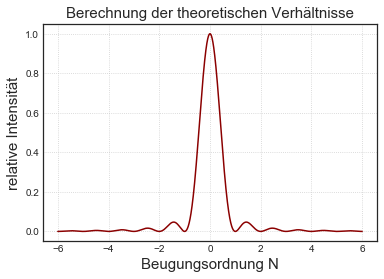

In [13]:
from scipy.signal import argrelextrema

def beugung_spalt(x):
    return np.sinc(x)**2
a=5
#kleinere Schrittweite für präzisere Berechnung der Maxima, ungerade Anzahl damit nur einmal das nullte berechnet wird
x=np.linspace(-(a+1),a+1,200001)

#Berechnung der relativen Maxima
slit_theory=argrelextrema(beugung_spalt(x), np.greater_equal, order = 1) 
max_theory=np.array(beugung_spalt(x[slit_theory]))
max_theory_sliced=max_theory[4::-1]

print('Die theoretischen Werte für die Verhältnisse Nebenmaximum/Hauptmaximum ergeben sich zu:')
print(max_theory_sliced)

plt.plot(x,beugung_spalt(x),color='darkred')
plt.title('Berechnung der theoretischen Verhältnisse',size=15)
plt.xlabel('Beugungsordnung N',size=15)
plt.ylabel('relative Intensität',size=15)
plt.grid(ls='dotted')


### Vergleich der Theorie-Werte mit unseren Messergebnissen

In [14]:
#Wir gehen bei den Theorie-Werten von einer fehlerfreien Bestimmung aus

#linke Seite
diff_max_theory_left=np.abs(max_theory_sliced-prob_max_max0_left)

#rechte Seite 
diff_max_theory_right=np.abs(max_theory_sliced-prob_max_max0_right)

print('Der Vergleich liefert für die linke Seite:')
print(diff_max_theory_left)
print('mit Fehler:')
print(prob_max_max0_left_err)
print()
print('Der Vergleich liefert für die rechte Seite:')
print(diff_max_theory_right)
print('mit Fehler:')
print(prob_max_max0_right_err)

NameError: name 'prob_max_max0_left' is not defined

## Teil 2: Beugungsstruktur des Doppelspaltes

In [15]:
#Beugungsfunktion des Doppelspalts

def beugung_doppelspalt(x):
    return np.sinc(x)**2*np.cos(np.pi*v*x)**2

#Berechnung des Verhältnisses von Spaltabstand & Spaltbreite



plt.plot(x,beugung_doppelspalt(x),color='darkred')
plt.title('Diagramm 19: Beugung am Doppelspalt',size=17)
plt.xlabel('$\pi \cdot x$',size=17)
plt.ylabel('relative Intensität  [b.E.]',size=17)
plt.grid(ls='dotted')
plt.ylim(0,1.1)

#Abspeichern des Diagramms
plt.tight_layout()
# plt.savefig('Diagramme/V233Diagramm19.pdf',format='PDF')




NameError: name 'v' is not defined

## Teil 3: Das Objektbild als Fouriersynthese

In [16]:
# import modules
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
from scipy.signal import argrelextrema 

In [17]:
# Integrand zu Formel 57, Einzelspalt
def spalt(k):
    return d/np.pi*np.sin(k*d/2)/(k*d/2)*np.cos(yi*k)

# Integrand zu 57, Doppelspalt
def doppelspalt(k):
    return d/np.pi*np.cos(k*g/2)*np.sin(k*d/2)/(k*d/2)*np.cos(yi*k)

In [86]:
# Funktion zur berechnung und zum plot des resultierenden Objektbildes

#d = sw_mm_mean
d = slit_width
def picture(
           function, # Integrand
           b,        # Integrationsbereich bezüglich der Nullstellen
           dateiname):
    
    # Definieren der Funktionsvariable
    global n
    global g
    g = 2*d
    n = b
    
    if function == spalt:
        y = np.linspace(-d, d, 301)
    else:
        y = np.linspace(-g, g, 501)
    
    # Berechnung des Objektbiles
    f_mod = []
    for i in range(len(y)): # numerische Inegration
        global yi 
        yi = y[i]
        result, error = quad(function, 0, 2*np.pi*n/d)
        f_mod.append(result**2)
    f_mod = f_mod/np.max(f_mod)
    
    # Lage der Maxima
    max1 = argrelextrema(f_mod, np.greater_equal, order = 1)
    f_max1 = f_mod[max1]
    y_max1 = y[max1]
    max2 = (f_max1 > 0.05)
    f_max = f_max1[max2]
    y_max = y_max1[max2]
    
    # Lage der Maxima
    min1 = argrelextrema(f_mod, np.less_equal, order = 1)
    f_min1 = f_mod[min1]
    y_min1 = y[min1]
    min2 = (f_min1 > 0.05)
    f_min = f_min1[min2]
    y_min = y_min1[min2]
    
    # Plot
    plt.figure(dateiname)
    plt.plot(y, f_mod, color = 'darkorange', linewidth = 0.8)
    plt.plot(y_max, f_max, linestyle ='', marker = 'x', color = 'blue', label = 'Maxima')
    plt.plot(y_min, f_min, linestyle ='', marker = 'x', color = 'darkred', label = 'Minima')
    plt.xlabel('y / d')
    plt.ylabel('Intensität / b. E.')
    plt.title('modifiziertes Objektbild %s' %dateiname)
    plt.ylim((0, 1.1))
    plt.savefig(r'C:\Users\Quirinus\Documents\GitHub\Praktikum\Praktikum\233 - Fourieroptik\Diagramme\%s.pdf' %dateiname)
    
    # Ausgabe der Lage der Maxima und Minima
    return y_max, f_max, y_min, f_min
    

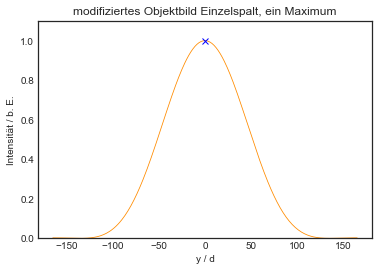

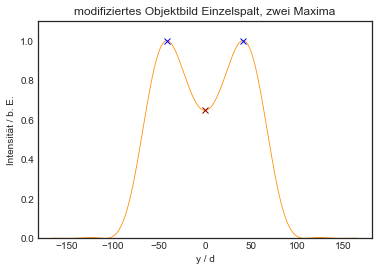

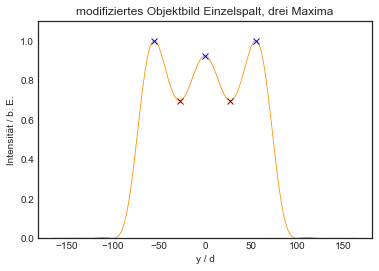

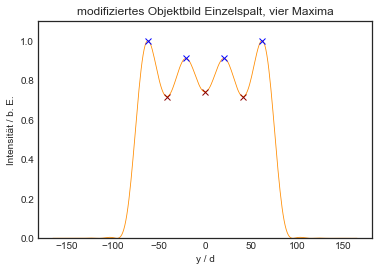

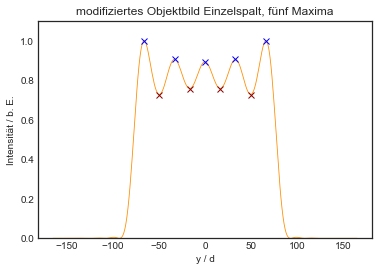

In [87]:
#Plotten der Einzelspaltbilder
maxPos_spalt1, maxInt_spalt1, minPos_spalt1, minInt_spalt1 = picture(spalt, 1, 'Einzelspalt, ein Maximum')
maxPos_spalt2, maxInt_spalt2, minPos_spalt2, minInt_spalt2 = picture(spalt, 2, 'Einzelspalt, zwei Maxima')
maxPos_spalt3, maxInt_spalt3, minPos_spalt3, minInt_spalt3 = picture(spalt, 3, 'Einzelspalt, drei Maxima')
maxPos_spalt4, maxInt_spalt4, minPos_spalt4, minInt_spalt4 = picture(spalt, 4, 'Einzelspalt, vier Maxima')
maxPos_spalt5, maxInt_spalt5, minPos_spalt5, minInt_spalt5 = picture(spalt, 5, 'Einzelspalt, fünf Maxima')

In [1]:
#Plotten der Doppelspaltbilder mit zuver berechnetem d und g
maxPos_dspalt1, maxInt_dspalt1, minPos_dspalt1, minInt_dspalt1 = picture(doppelspalt, 1, 'Doppelspalt, ein Maxima')
maxPos_dspalt2, maxInt_dspalt2, minPos_dspalt2, minInt_dspalt2 = picture(doppelspalt, 2, 'Doppelspalt, zwei Maxima')
maxPos_dspalt3, maxInt_dspalt3, minPos_dspalt3, minInt_dspalt3 = picture(doppelspalt, 3, 'Doppelspalt, drei Maxima')
maxPos_dspalt4, maxInt_dspalt4, minPos_dspalt4, minInt_dspalt4 = picture(doppelspalt, 4, 'Doppelspalt, vier Maxima')
maxPos_dspalt5, maxInt_dspalt5, minPos_dspalt5, minInt_dspalt5 = picture(doppelspalt, 5, 'Doppelspalt, fünf Maxima')
maxPos_dspalt15, maxInt_dspalt15, minPos_dspalt15, minInt_dspalt15 = picture(doppelspalt, 15, 'Doppelspalt, fünfzehen Maxima')

NameError: name 'picture' is not defined

In [107]:
# Funktion zum Bestimmen der Extrema
def distance(pos):
    Pos = []
    if len(pos) < 2:
        True
    else:
        for i in range(len(pos) - 1):
            Pos.append(pos[i+1] - pos[i])
    return np.round(Pos, 1)

def distance_err(pos_err):
    Pos_err = []
    if len(pos_err) < 2:
        True
    else:
        for i in range(len(pos_err) - 1):
            Pos_err.append(np.sqrt(pos_err[i+1]**2 + pos_err[i]**2))
    return np.round(Pos_err, 1)

In [108]:
# Bestimmen der theoretischen Abstände der Maxima und Minima
dist_spalt1_max = distance(maxPos_spalt1) 
dist_spalt2_max = distance(maxPos_spalt2) 
dist_spalt3_max = distance(maxPos_spalt3) 
dist_spalt1_min = distance(minPos_spalt1) 
dist_spalt2_min = distance(minPos_spalt2) 
dist_spalt3_min = distance(minPos_spalt3) 

# selbiges für Experimentelle Werte, mit Fehlern
maxPos_spalt1_ex = np.array([1138])
maxPos_spalt2_ex = np.array([1101, 1171])
maxPos_spalt3_ex = np.array([1090, 1138, 1183])
maxPos_spalt1_ex_err = np.array([4])
maxPos_spalt2_ex_err = np.array([5, 5])
maxPos_spalt3_ex_err = np.array([6, 4, 5])

minPos_spalt1_ex = np.array([])
minPos_spalt2_ex = np.array([1090])
minPos_spalt3_ex = np.array([1112, 1160])
minPos_spalt1_ex_err = np.array([])
minPos_spalt2_ex_err = np.array([5])
minPos_spalt3_ex_err = np.array([6, 5])

# Bestimmen der theoretischen Abstände der Maxima und Minima
dist_spalt1_max_ex = distance(maxPos_spalt1_ex) 
dist_spalt2_max_ex = distance(maxPos_spalt2_ex) 
dist_spalt3_max_ex = distance(maxPos_spalt3_ex)
dist_spalt1_max_ex_err = distance_err(maxPos_spalt1_ex_err) 
dist_spalt2_max_ex_err = distance_err(maxPos_spalt2_ex_err) 
dist_spalt3_max_ex_err = distance_err(maxPos_spalt3_ex_err)

dist_spalt1_min_ex = distance(minPos_spalt1_ex) 
dist_spalt2_min_ex = distance(minPos_spalt2_ex) 
dist_spalt3_min_ex = distance(minPos_spalt3_ex)
dist_spalt1_min_ex_err = distance_err(minPos_spalt1_ex_err) 
dist_spalt2_min_ex_err = distance_err(minPos_spalt2_ex_err) 
dist_spalt3_min_ex_err = distance_err(minPos_spalt3_ex_err)

In [112]:
#Theoretische Abstände der Maxima und Minima für den Doppelsplalt, 15 Maxima
dist_dspalt15_max = distance(maxPos_dspalt15[15:]) 
dist_dspalt15_min = distance(minPos_dspalt15[15:]) 

# selbiges für Experimentelle Werte, mit Fehlern
maxPos_dspalt15_ex = np.array([808.5, 816.3, 826.1, 836.3, 844.5, 855.0, 864.0, 873.6, 883.1, 892.0, 902.3, 910.8, 921.0, 929.9, 941.0])
maxPos_dspalt15_ex_err = np.array([0.5, 0.4, 1.0, 0.2, 0.6, 1.0, 1.0, 0.6, 0.8, 1.0, 0.4, 0.6, 0.4, 0.6, 1.0])

minPos_dspalt15_ex = np.array([812.0, 824.6, 831.0, 840.0, 859.2, 869.2, 879.0, 883.0, 898.3, 907.0, 914.3, 925.2, 935.3])
minPos_dspalt15_ex_err = np.array([1.0, 0.6, 1.0, 0.7, 1.0, 0.4, 0.6, 1.0, 1.0, 0.7, 1.0, 0.6, 0.6, 0.6])

# Bestimmen der theoretischen Abstände der Maxima und Minima
dist_dspalt15_max_ex = distance(maxPos_dspalt15_ex)
dist_dspalt15_max_ex_err = distance_err(maxPos_dspalt15_ex_err)

dist_dspalt15_min_ex = distance(minPos_dspalt15_ex)
dist_dspalt15_min_ex_err = distance_err(minPos_dspalt15_ex_err)

## Vergleich des Einzelspalts

In [113]:
print('Theoretische Abstände der Maxima:')
print('ein Maximum:',dist_spalt1_max)
print('zwei Maximum:',dist_spalt2_max)
print('drei Maximum:',dist_spalt3_max)
print()

print('Theoretische Abstände der Minima:')
print('kein Minimum:',dist_spalt1_min)
print('ein Minimum:',dist_spalt2_min)
print('zwei Minima:',dist_spalt3_min)
print()

print('Experimentelle Abstände der Maxima:')
print('ein Maximum:',dist_spalt1_max_ex)
print('+-', dist_spalt1_max_ex_err)
print('zwei Maxima:',dist_spalt2_max_ex)
print('+-', dist_spalt2_max_ex_err)
print('drei Maxima:',dist_spalt3_max_ex)
print('+-', dist_spalt3_max_ex_err)
print()

print('Experimentelle Abstände der Minima:')
print('kein Minimum:',dist_spalt1_min_ex)
print('+-', dist_spalt1_min_ex_err)
print('ein Minimum:',dist_spalt2_min_ex)
print('+-', dist_spalt2_min_ex_err)
print('zwei Minima:',dist_spalt3_min_ex)
print('+-', dist_spalt3_min_ex_err)

Theoretische Abstände der Maxima:
ein Maximum: []
zwei Maximum: [ 81.5]
drei Maximum: [ 55.1  55.1]

Theoretische Abstände der Minima:
kein Minimum: []
ein Minimum: []
zwei Minima: [ 55.1]

Experimentelle Abstände der Maxima:
ein Maximum: []
+- []
zwei Maxima: [70]
+- [ 7.1]
drei Maxima: [48 45]
+- [ 7.2  6.4]

Experimentelle Abstände der Minima:
kein Minimum: []
+- []
ein Minimum: []
+- []
zwei Minima: [48]
+- [ 7.8]


## Vergleich des Doppelspalts, 15 Maxima

In [114]:
print('Theoretische Abstände der Maxima:')
print(dist_dspalt15_max)
print()
print('Theoretische Abstände der Minima:')
print(dist_dspalt15_min)
print()
print('Experimentelle Abstände der Maxima:')
print(dist_dspalt15_max_ex)
print('+-', dist_dspalt15_max_ex_err)
print()
print('Experimentelle Abstände der Minima:')
print(dist_dspalt15_min_ex)
print('+-', dist_dspalt15_min_ex_err)

Theoretische Abstände der Maxima:
[ 10.6  10.6  11.9  10.6  10.6  11.9  10.6  10.6  11.9  10.6  10.6  11.9
  10.6  10.6]

Theoretische Abstände der Minima:
[ 11.9  10.6  10.6  11.9  10.6  10.6  10.6  11.9  10.6  10.6  11.9  10.6]

Experimentelle Abstände der Maxima:
[  7.8   9.8  10.2   8.2  10.5   9.    9.6   9.5   8.9  10.3   8.5  10.2
   8.9  11.1]
+- [ 0.6  1.1  1.   0.6  1.2  1.4  1.2  1.   1.3  1.1  0.7  0.7  0.7  1.2]

Experimentelle Abstände der Minima:
[ 12.6   6.4   9.   19.2  10.    9.8   4.   15.3   8.7   7.3  10.9  10.1]
+- [ 1.2  1.2  1.2  1.2  1.1  0.7  1.2  1.4  1.2  1.2  1.2  0.8  0.8]


## Teil 4: Fourierbild des Doppelspaltes